<a href="https://colab.research.google.com/github/iraseel74/mining-project/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

creating a sample data set

In [1]:
import pandas as pd
data = pd.read_csv('student-por.csv')

sample_size = 0.40
sampled_data = data.sample(frac=sample_size, random_state=42)
sampled_data.to_csv('student_sample.csv', index=False)

graphs for the sampled data :

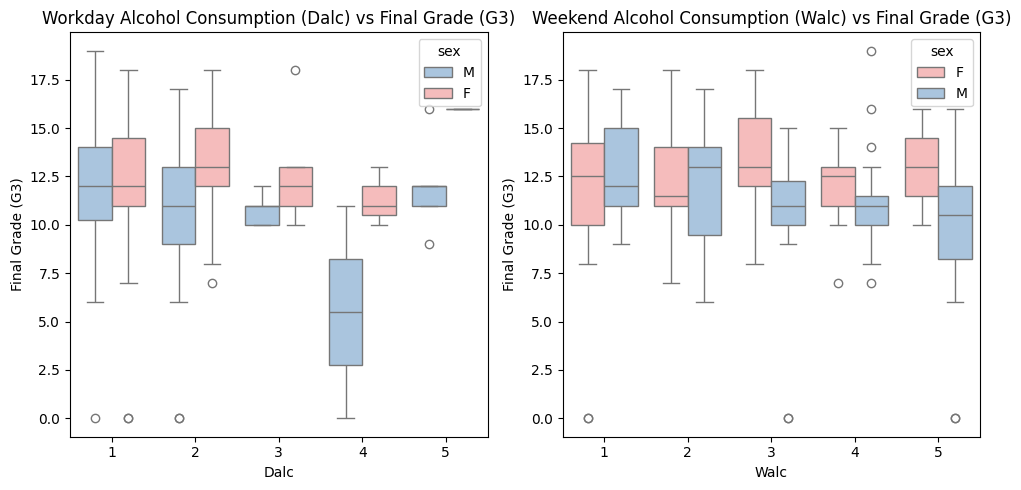

In [2]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 5))
custom_palette = {'F': '#FFB2B2', 'M': '#A1C6E7'} # custom color palette
data = pd.read_csv('student_sample.csv')
# Boxplot for Dalc vs G3 (Final Grade)
plt.subplot(1, 2, 1)
sns.boxplot(x='Dalc', y='G3', data=data, palette=custom_palette, hue='sex')
plt.title('Workday Alcohol Consumption (Dalc) vs Final Grade (G3)')
plt.xlabel('Dalc')
plt.ylabel('Final Grade (G3)')

# Boxplot for Walc vs G3 (Final Grade)
plt.subplot(1, 2, 2)
sns.boxplot(x='Walc', y='G3', data=data, palette=custom_palette, hue='sex')
plt.title('Weekend Alcohol Consumption (Walc) vs Final Grade (G3)')
plt.xlabel('Walc')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()


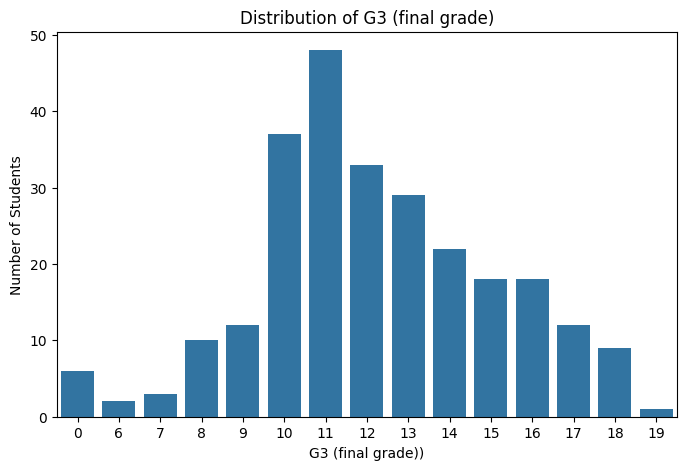

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('student_sample.csv')
plt.figure(figsize=(8, 5))
sns.countplot(x='G3', data=data)
plt.title('Distribution of G3 (final grade)')
plt.xlabel('G3 (final grade))')
plt.ylabel('Number of Students')
plt.show()

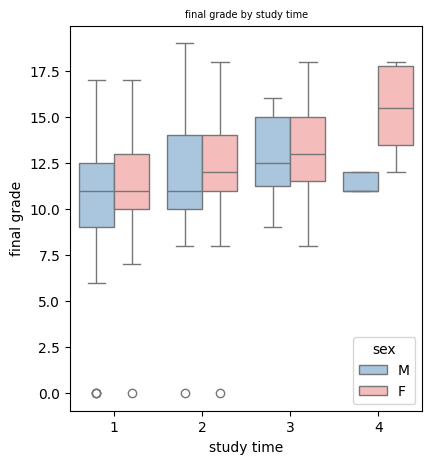

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('student_sample.csv')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='studytime', y='G3', data=data, palette=custom_palette, hue='sex')
plt.title('final grade by study time', fontsize=7)
plt.xlabel('study time')
plt.ylabel('final grade')
plt.show()

Text(0, 0.5, 'Final Grade')

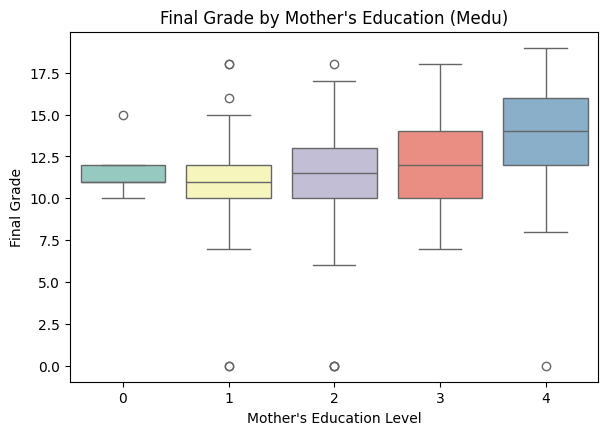

In [5]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Medu', y='G3', data=pd.read_csv('student_sample.csv'), palette="Set3")
plt.title("Final Grade by Mother's Education (Medu)")
plt.xlabel("Mother's Education Level")
plt.ylabel("Final Grade")

Text(0, 0.5, 'Final Grade')

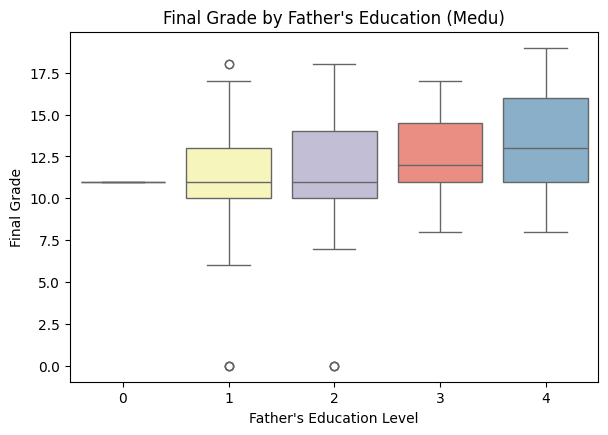

In [6]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Fedu', y='G3', data=pd.read_csv('student_sample.csv'), palette="Set3")
plt.title("Final Grade by Father's Education (Medu)")
plt.xlabel("Father's Education Level")
plt.ylabel("Final Grade")

Text(0, 0.5, 'Final Grade')

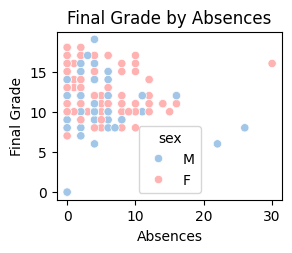

In [7]:
plt.subplot(2, 2, 3)
sns.scatterplot(x='absences', y='G3', data=pd.read_csv('student_sample.csv'), hue='sex', palette=custom_palette)
plt.title("Final Grade by Absences")
plt.xlabel("Absences")
plt.ylabel("Final Grade")

let's see the original data before preprocessing

In [8]:
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       MS   M   18       U     GT3       T     4     4   teacher   teacher   
1       GP   F   16       U     GT3       A     3     1  services     other   
2       MS   F   18       U     GT3       T     4     4   teacher   teacher   
3       MS   M   16       R     LE3       A     4     4   at_home     other   
4       GP   F   15       R     GT3       T     1     1     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
255     GP   F   16       R     GT3       T     1     1     other  services   
256     GP   F   19       U     GT3       T     1     1     other     other   
257     GP   F   17       U     GT3       T     2     2     other     other   
258     MS   F   17       R     GT3       T     0     0   at_home     other   
259     MS   F   17       R     GT3       T     3     2   at_home     other   

     ... famrel freetime  goout  Dalc  Walc health 

is there missing values?

calculate mean and variance

**-Variance:**

 Variance helps understand the extent of dispersion or scatter of values in each column. As the variance increases, it indicates that the values are more spread out and scattered away from the mean, whereas decreasing variance suggests that the values are less scattered and closer to the mean value. Therefore, our variance results:

-Absences (21.54) have the highest variance, meaning the number of student absences is very spread out, with some students having many absences and others having very few.


-Grades (G1: 7.54, G2: 8.49, G3: 10.44) also show high variance, indicating that students' academic performance varies significantly.

-Health (2.09) and alcohol consumption (Walc: 1.65) show moderate variance, meaning there are some differences in students' health and weekend alcohol consumption.

-Failures (0.35) and travel time (0.56) have low variance, meaning most students have similar values in these categories.

**-Mean:**

This represents the average value for each column.

-Age (16.74) indicates that most students are around 17 years old.

-Grades (G1: 11.40, G2: 11.57, G3: 11.91) show that the average grade for students is around 12.

-Absences (3.66) and failures (0.22) indicate that most students have low absences and very few have failed.

-Walc (2.28) and Dalc (1.50) suggest moderate weekend alcohol consumption but lower daily alcohol consumption on average.

In [9]:
import pandas as pd
data = pd.read_csv('student-por.csv')
missing_values = data.isnull().sum()
numeric_data = data.select_dtypes(include=['number'])
mean_values = numeric_data.mean()
variance_values = numeric_data.var()
print("Missing Values in Each Column:\n", missing_values)
print("\nMean Values:\n", mean_values)
print("\nVariance Values:\n", variance_values)

Missing Values in Each Column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Mean Values:
 age           16.744222
Medu           2.514638
Fedu           2.306626
traveltime     1.568567
studytime      1.930663
failures       0.221880
famrel         3.930663
freetime       3.180277
goout          3.184900
Dalc           1.502311
Walc           2.280431
health         3.536210
absences       3.659476
G1            11.399076
G2            11.570108
G3            11.906009
dtype: float64

Variance Val

now preprocessing :

1- detect outliers and remove if any

to make sure we have clean data

In [11]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
data_no_outliers = data.copy()  # Create a copy to ensure original data is not modified

# Detecting outliers for G3 using Z-scores
z_scores = np.abs(stats.zscore(data['G3']))
threshold_g3 = 3
outliers_g3 = data[z_scores > threshold_g3]
print("G3 outliers:")
print(outliers_g3)

# Detecting outliers for Dalc (Workday Alcohol Consumption) using the IQR method
Q1_dalc = data['Dalc'].quantile(0.25)
Q3_dalc = data['Dalc'].quantile(0.75)
IQR_dalc = Q3_dalc - Q1_dalc
lower_bound_dalc = Q1_dalc - 1.5 * IQR_dalc
upper_bound_dalc = Q3_dalc + 1.5 * IQR_dalc
outliers_dalc = data[(data['Dalc'] < lower_bound_dalc) | (data['Dalc'] > upper_bound_dalc)]
print("Dalc outliers:")
print(outliers_dalc)

# Detecting outliers for Walc (Weekend Alcohol Consumption) using the IQR method
Q1_walc = data['Walc'].quantile(0.25)
Q3_walc = data['Walc'].quantile(0.75)
IQR_walc = Q3_walc - Q1_walc
lower_bound_walc = Q1_walc - 1.5 * IQR_walc
upper_bound_walc = Q3_walc + 1.5 * IQR_walc
outliers_walc = data[(data['Walc'] < lower_bound_walc) | (data['Walc'] > upper_bound_walc)]
print("Walc outliers:")
print(outliers_walc)

# Detecting outliers for absences using the IQR method
Q1_absences = data['absences'].quantile(0.25)
Q3_absences = data['absences'].quantile(0.75)
IQR_absences = Q3_absences - Q1_absences
lower_bound_absences = Q1_absences - 1.5 * IQR_absences
upper_bound_absences= Q3_absences + 1.5 * IQR_absences
outliers_absences = data[(data['absences'] < lower_bound_absences) | (data['absences'] > upper_bound_absences)]
print("absences outliers:")
print(outliers_absences)

# Remove outliers from G3, Dalc, and Walc
data_no_outliers = data[(z_scores <= threshold_g3) &
                        (data['Dalc'] >= lower_bound_dalc) &
                        (data['Dalc'] <= upper_bound_dalc) &
                        (data['Walc'] >= lower_bound_walc) &
                        (data['Walc'] <= upper_bound_walc)&
                        (data['absences'] >= lower_bound_absences) &
                        (data['absences'] <= upper_bound_absences)]

print("Data after removing outliers:")
print(data_no_outliers)

# Save the modified dataset without outliers
data_no_outliers.to_csv('student-por-no-outliers.csv', index=False)

G3 outliers:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
163     GP   M   18       U     LE3       T     1     1     other     other   
172     GP   M   16       U     GT3       T     3     3     other  services   
440     MS   M   16       U     GT3       T     1     1   at_home  services   
519     MS   M   16       R     GT3       T     2     1     other  services   
563     MS   M   17       U     GT3       T     2     2     other     other   
567     MS   M   18       R     GT3       T     3     2  services     other   
583     MS   F   18       R     GT3       T     2     2     other     other   
586     MS   F   17       U     GT3       T     4     2   teacher  services   
597     MS   F   18       R     GT3       T     2     2   at_home     other   
603     MS   F   18       R     LE3       A     4     2   teacher     other   
605     MS   F   19       U     GT3       T     1     1   at_home  services   
610     MS   F   19       R     GT3    

2- encoding categorical data (Transformation)

I encoded categorical columns using LabelEncoder to convert them into numerical format, which is necessary for many machine learning algorithms. This ensures the model can interpret these features correctly.

In [12]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
data_encoding = data_no_outliers.copy()  # Create a copy to ensure original data is not modified

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                    'Mjob', 'Fjob', 'reason', 'guardian',
                    'schoolsup', 'famsup', 'paid',
                    'activities', 'nursery', 'higher',
                    'internet', 'romantic']

for col in categorical_cols:
    data_encoding[col] = le.fit_transform(data_encoding[col])

# Save the encoded dataset
data_encoding.to_csv('student-por-encoded.csv', index=False)

# Print the encoded dataset
print(data_encoding)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        0        0        1     2     3     3     2  ...   
645       1    0   18        1        1        1     3     1     4     3  ...   
646       1    0   18        1        0        1     1     1     2     2  ...   
647       1    1   17        1        1        1     3     1     3     3  ...   
648       1    1   18        0        1        1     3     2     3     2  ...   

     famrel  freetime  goou

3-Normalization

our data doesn't contain any feature to normalize, since it all either binary or categorical

so no need for Normalization

4-Discretization

I used pd.qcut to discretize the numerical grades (G1, G2, G3) and absences into categorical labels ('Low', 'Medium', 'High') to simplify the data and make it more interpretable for modeling. For absences, I created two categories to focus on high and low absence rates. I also categorized age into three bins (0-16, 17-18, and 19+) to treat it as a categorical feature, which can be beneficial for analysis.

In [18]:
import pandas as pd
data_discre =  data_encoding.copy()

the_label = ['Low', 'Medium', 'High']

data_discre['G3'] = pd.qcut(data_discre['G3'], q=3, labels=the_label, duplicates='drop')
data_discre['G2'] = pd.qcut(data_discre['G2'], q=3, labels=the_label, duplicates='drop')
data_discre['G1'] = pd.qcut(data_discre['G1'], q=3, labels=the_label, duplicates='drop')
data_discre['absences'] = pd.qcut(data_discre['absences'], q=2, labels=the_label[:2], duplicates='drop')

age_bins = [0, 16, 18, 100]
age_labels = [0, 1, 2]

data_discre['age'] = pd.cut(data_discre['age'], bins=age_bins, labels=age_labels)

data_discre.to_csv('student-por-discre.csv', index=False)

print(data_discre)

     school  sex age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   1        1        0        0     4     4     0     4  ...   
1         0    0   1        1        0        1     1     1     0     2  ...   
2         0    0   0        1        1        1     1     1     0     2  ...   
3         0    0   0        1        0        1     4     2     1     3  ...   
4         0    0   0        1        0        1     3     3     2     2  ...   
..      ...  ...  ..      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   2        0        0        1     2     3     3     2  ...   
645       1    0   1        1        1        1     3     1     4     3  ...   
646       1    0   1        1        0        1     1     1     2     2  ...   
647       1    1   1        1        1        1     3     1     3     3  ...   
648       1    1   1        0        1        1     3     2     3     2  ...   

     famrel  freetime  goout  Dalc  Wal

5-Feature selection

Simplify the Dataset: It makes everything easier to manage and faster to analyze.

Boost Model Performance: By keeping only important features, I can improve the accuracy of predictions.

In [36]:
# Combine the previous codes to perform feature selection and print results

# Load the dataset
data = pd.read_csv('student-por-discre.csv')

# Convert G3 to numeric codes for correlation purposes
data['G3_numeric'] = data['G3'].astype('category').cat.codes

cor_age = data_selection['age'].corr(data_selection['G3'].cat.codes)
cor_Medu = data_selection['Medu'].corr(data_selection['G3'].cat.codes)
cor_Fedu = data_selection['Fedu'].corr(data_selection['G3'].cat.codes)
cor_traveltime = data_selection['traveltime'].corr(data_selection['G3'].cat.codes)
cor_studytime = data_selection['studytime'].corr(data_selection['G3'].cat.codes)
cor_failures = data_selection['failures'].corr(data_selection['G3'].cat.codes)
cor_famrel = data_selection['famrel'].corr(data_selection['G3'].cat.codes)
cor_freetime = data_selection['freetime'].corr(data_selection['G3'].cat.codes)
cor_goout = data_selection['goout'].corr(data_selection['G3'].cat.codes)
cor_health = data_selection['health'].corr(data_selection['G3'].cat.codes)

# Print the correlation coefficients
print("Correlation coefficients with G3:")
print("Age:", cor_age)
print("Medu:", cor_Medu)
print("Fedu:", cor_Fedu)
print("Travel Time:", cor_traveltime)
print("Study Time:", cor_studytime)
print("Failures:", cor_failures)
print("Family Relationship:", cor_famrel)
print("Free Time:", cor_freetime)
print("Going Out:", cor_goout)
print("Health:", cor_health)
print("")

# Select numeric features for correlation analysis
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('G3_numeric')  # Exclude the target variable

# Calculate correlation with G3_numeric
correlations = data[numeric_features].corrwith(data['G3_numeric'])

# Perform chi-square test for categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['G3'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results[feature] = chi2_stat

# Select significant features based on correlation and chi-square test
significant_correlations = correlations[abs(correlations) > 0.2].index.tolist()
significant_chi2 = [feature for feature, chi2_stat in chi2_results.items() if chi2_stat > 10]

# Combine selected features
selected_features = significant_correlations + significant_chi2

# Remove uncorrelated features from the original dataset
data_reduced = data[selected_features + ['G3']]  # Include the target variable

# Save the reduced dataset to a new CSV file
data_reduced.to_csv('student-por-reduced.csv', index=False)

# Prepare results for printing
correlation_results = correlations[significant_correlations]
chi2_results_selected = {feature: chi2_results[feature] for feature in significant_chi2}

# Chi-Square test for G1
contingency_table_g1 = pd.crosstab(data['G1'], data['G3'])
chi2_stat_g1, p_value_g1, dof_g1, expected_g1 = chi2_contingency(contingency_table_g1)

# Chi-Square test for G2
contingency_table_g2 = pd.crosstab(data['G2'], data['G3'])
chi2_stat_g2, p_value_g2, dof_g2, expected_g2 = chi2_contingency(contingency_table_g2)

# Chi-Square test for absences
contingency_table_absences = pd.crosstab(data['absences'], data['G3'])
chi2_stat_absences, p_value_absences, dof_absences, expected_absences = chi2_contingency(contingency_table_absences)

# Compile results
chi_square_results = {
    'G1': {
        'Chi-Square Statistic': chi2_stat_g1,
        'p-value': p_value_g1,
        'Degrees of Freedom': dof_g1,
        'Expected Frequencies': expected_g1
    },
    'G2': {
        'Chi-Square Statistic': chi2_stat_g2,
        'p-value': p_value_g2,
        'Degrees of Freedom': dof_g2,
        'Expected Frequencies': expected_g2
    },
    'Absences': {
        'Chi-Square Statistic': chi2_stat_absences,
        'p-value': p_value_absences,
        'Degrees of Freedom': dof_absences,
        'Expected Frequencies': expected_absences
    }
}

print(chi_square_results)
print("")

# Print the selected features and their corresponding results
print("")
print("the selected features ")
print(selected_features)
print("")
print("correlation")
print(correlation_results)
print("")
print("chi square")
print(chi2_results_selected)
print("")
print("data shape after reduced ")
print(data_reduced.shape)


Correlation coefficients with G3:
Age: -0.009089997954284975
Medu: 0.29871149294230187
Fedu: 0.21420544053095297
Travel Time: -0.17595339783190458
Study Time: 0.24293599988865072
Failures: -0.31885266067112983
Family Relationship: 0.06777120127896358
Free Time: -0.06096646344388654
Going Out: -0.06960224410314415
Health: -0.1199585522696081

{'G1': {'Chi-Square Statistic': 466.18001058692397, 'p-value': 1.3793668538896619e-99, 'Degrees of Freedom': 4, 'Expected Frequencies': array([[47.71061644, 64.54965753, 36.73972603],
       [66.60273973, 90.10958904, 51.28767123],
       [72.68664384, 98.34075342, 55.97260274]])}, 'G2': {'Chi-Square Statistic': 742.2096591498404, 'p-value': 2.5228162212355896e-159, 'Degrees of Freedom': 4, 'Expected Frequencies': array([[ 47.71061644,  64.54965753,  36.73972603],
       [ 89.01712329, 120.43493151,  68.54794521],
       [ 50.27226027,  68.01541096,  38.71232877]])}, 'Absences': {'Chi-Square Statistic': 18.352358463566073, 'p-value': 0.000103475133